In [1]:
from fastai2.basics import *
from fastai2.callback.all import *
from fastai2.vision.all import *

In [2]:
lbl2name = dict(n01440764='tench',
                n02102040='english springer',
                n02979186='cassete player',
                n03000684='chainsaw',
                n03028079='church',
                n03394916='french horn',
                n03417042='garbage truck',
                n03425413='gas pump',
                n03445777='golf ball',
                n03888257='parachute',
                )

In [3]:
path = untar_data(URLs.IMAGENETTE); path.ls()

(#3) [/home/lgvaz/.fastai/data/imagenette/log.csv,/home/lgvaz/.fastai/data/imagenette/val,/home/lgvaz/.fastai/data/imagenette/train]

In [4]:
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
          get_items=get_image_files,
          splitter=GrandparentSplitter(valid_name='val'),
          get_y=[parent_label, lbl2name.get])

In [5]:
dbunch = dblock.databunch(path,
                          bs=64,
                          item_tfms=[Resize(128)],
                          batch_tfms=[Flip(), Normalize(*imagenet_stats)])

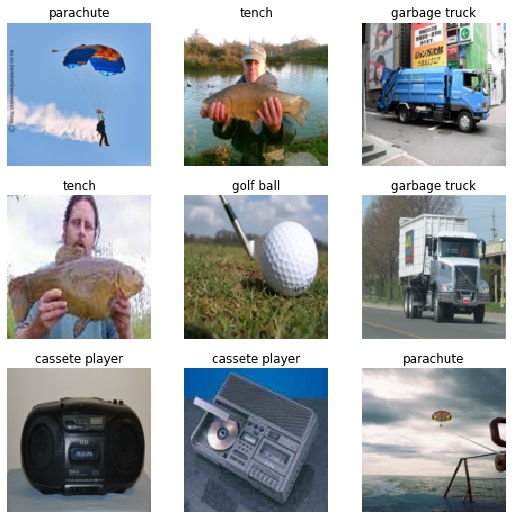

In [6]:
dbunch.show_batch()

In [6]:
def opt_func(*args, **kwargs):
  opt = RAdam(*args, mom=0.95, wd=1e-2, eps=1e-6, **kwargs)
  return Lookahead(opt)

In [ ]:
~/libs/fastai_dev/fastai2/vision/models/xresnet.py

In [10]:
from fastai2.vision.models.xresnet import _xresnet

In [14]:
SimpleSelfAttention??

In [9]:
m = xresnet50(sa=True,)
learn = Learner(dbunch, m, LabelSmoothingCrossEntropy(), metrics=[accuracy], 
                opt_func=opt_func,
                cb_funcs=[CSVLogger])

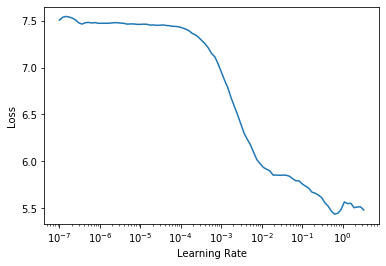

In [9]:
learn.lr_find()

In [ ]:
learn.fit_flat_cos(5, 4e-3)

epoch,train_loss,valid_loss,accuracy,time


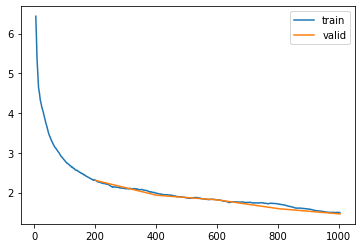

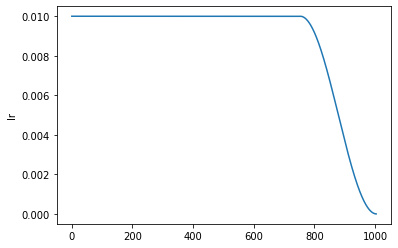

In [10]:
learn.recorder.plot_loss(); learn.recorder.plot_sched()